In [3]:
import tensorflow 

In [4]:
from tensorflow import keras


In [5]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
train_images.shape

(60000, 28, 28)

In [9]:
len(train_labels)

60000

In [10]:
test_images.shape

(10000, 28, 28)

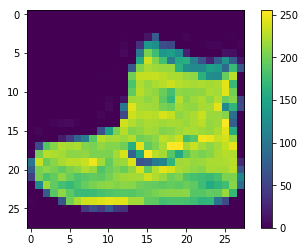

In [11]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [12]:
train_images = train_images / 255.0

test_images = test_images / 255.0

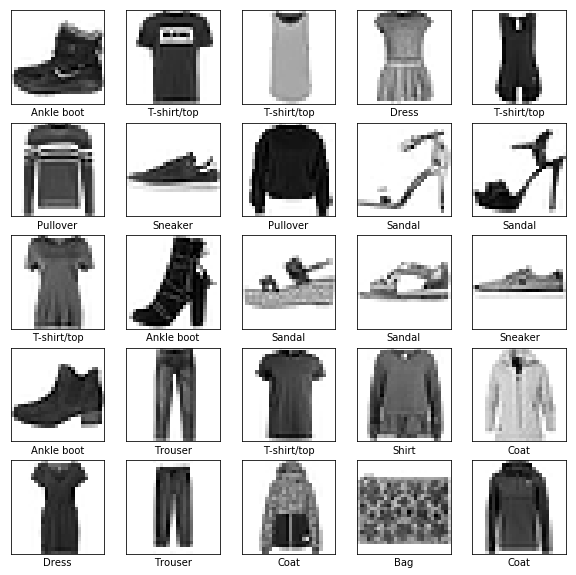

In [13]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [15]:
model=keras.Sequential([keras.layers.Flatten(input_shape=(28,28)),
                       keras.layers.Dense(128,activation=tensorflow.nn.relu),
                       keras.layers.Dense(10,activation=tensorflow.nn.softmax)])

In [16]:
model.compile(optimizer=tensorflow.train.AdamOptimizer(),loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.fit(train_images,train_labels,epochs=20)

Epoch 1/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2315 - acc: 0.9145
Epoch 2/20
60000/60000 [==============================] - 4s 61us/step - loss: 0.2233 - acc: 0.9160
Epoch 3/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2181 - acc: 0.9176
Epoch 4/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.2099 - acc: 0.9210
Epoch 5/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.2048 - acc: 0.9224
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.1984 - acc: 0.9259
Epoch 7/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1942 - acc: 0.9270
Epoch 8/20
60000/60000 [==============================] - 4s 67us/step - loss: 0.1888 - acc: 0.9300
Epoch 9/20
60000/60000 [==============================] - 4s 63us/step - loss: 0.1850 - acc: 0.9309
Epoch 10/20
60000/60000 [==============================] - 4s 62us/step - loss: 0.1813 - acc: 0.9329

In [40]:
test_loss, test_acc=model.evaluate(test_images,test_labels)
print('test accuracy = ',test_acc)

10000/10000 [==============================] - 0s 28us/step
test accuracy =  0.8903


In [43]:
predictions=model.predict(test_images)

In [44]:
predictions[0]

array([6.2528188e-10, 1.8239781e-15, 2.3295066e-15, 1.4297554e-18,
       2.4960440e-21, 1.1564452e-07, 3.6106697e-14, 1.5704446e-04,
       7.0984724e-12, 9.9984276e-01], dtype=float32)

In [45]:
np.argmax(predictions[0])

9

In [46]:
test_labels[0]

9

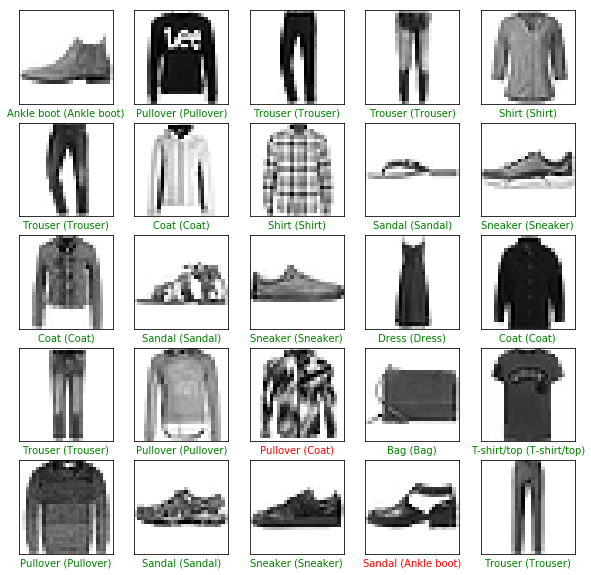

In [51]:
plt.figure(figsize=(10,10))
for i in range(0,25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i],cmap=plt.cm.binary)
    predicted_labels=np.argmax(predictions[i])
    true_labels=test_labels[i]
    if(predicted_labels==true_labels):
        color='green'
    else:
        color='red'
    plt.xlabel("{} ({})".format(class_names[predicted_labels], 
                                  class_names[true_labels]),
                                  color=color)
      

In [52]:
img = test_images[0]
img = (np.expand_dims(img,0))
predictions1 = model.predict(img)

print(predictions1)
prediction = predictions1[0]

np.argmax(prediction)

[[6.2528188e-10 1.8239711e-15 2.3294888e-15 1.4297445e-18 2.4960155e-21
  1.1564408e-07 3.6106558e-14 1.5704431e-04 7.0984048e-12 9.9984276e-01]]


9